# Análisis dataset diamonds

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

## Análisis univariante

* sns.displot()
* sns.ecdfplot()
* sns.countplot()
* sns.kdeplot()
* sns.rugplot()
* sns.countplot()
* sns.boxplot()

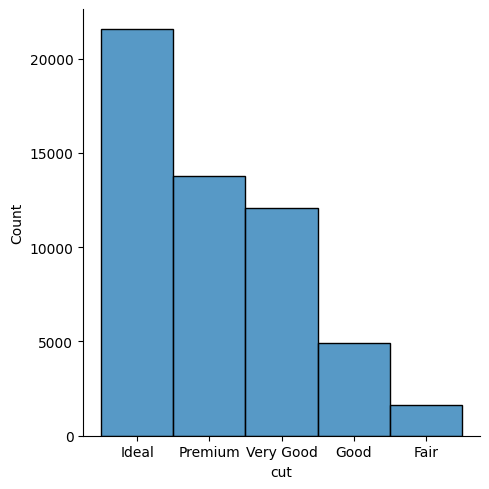

In [4]:
sns.displot(data=df, x='cut')

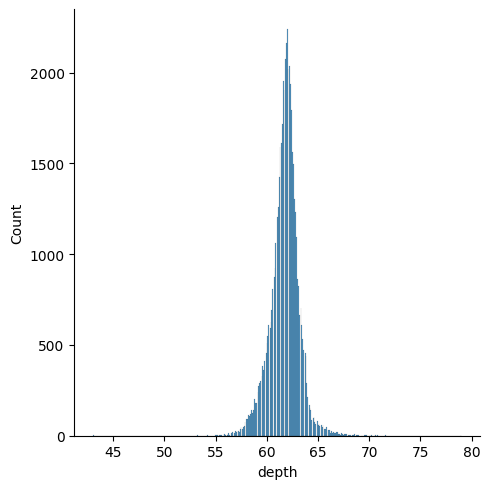

In [5]:
sns.displot(data=df, x='depth')

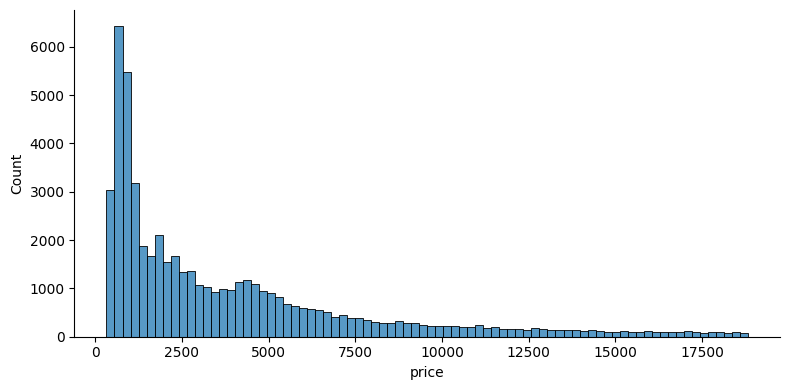

In [6]:
sns.displot(data=df, x='price', height=4, aspect=2) # ny halavany sy angezany

In [7]:
print(df['cut'].unique())
print(df['clarity'].unique())


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


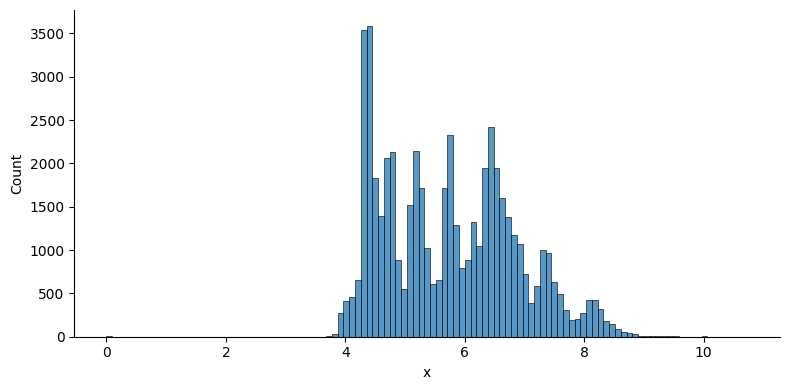

In [8]:
sns.displot(data=df, x='x', height=4, aspect=2)

[Text(0, 0, '21551'),
 Text(0, 0, '13791'),
 Text(0, 0, '12082'),
 Text(0, 0, '4906'),
 Text(0, 0, '1610')]

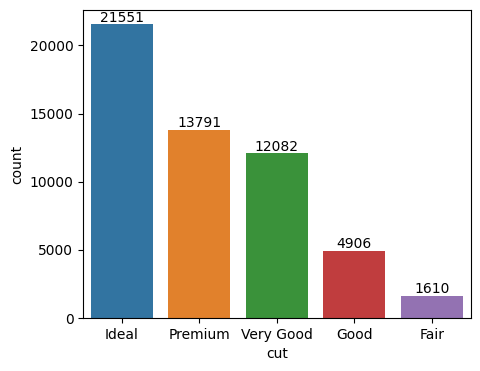

In [9]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='cut')
ax.bar_label(ax.containers[0])

(2.0, 10.0)

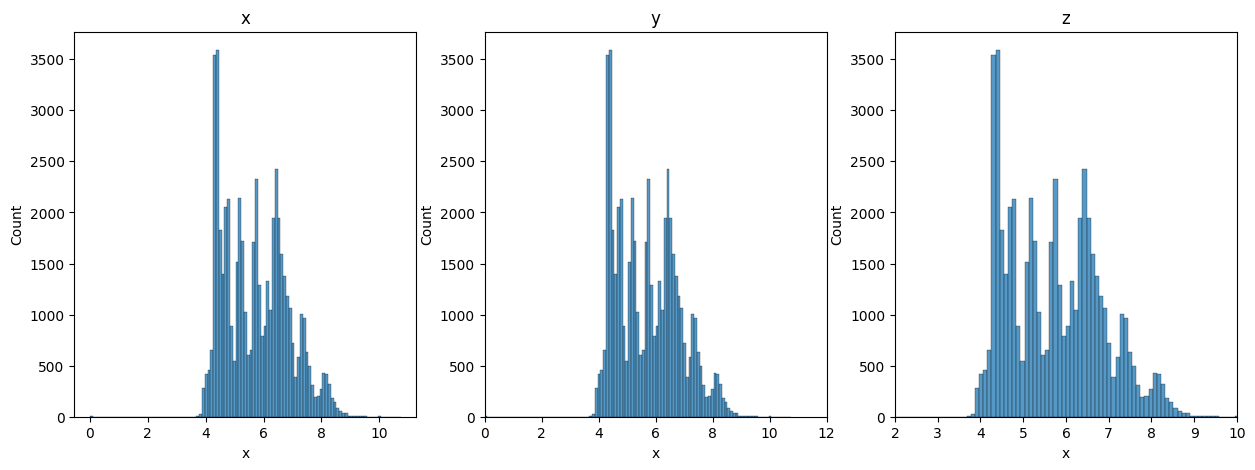

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#displot no deja porque tiene su propia gráfic no se puede añadir en subplots
sns.histplot(data=df, x='x', ax=axes[0])
axes[0].set_title('x')

sns.histplot(data=df, x='x', ax=axes[1])
axes[1].set_title('y')
axes[1].set_xlim([0, 12]) # cambiar los límites del eje x

sns.histplot(data=df, x='x', ax=axes[2])
axes[2].set_title('z')
axes[2].set_xlim([2, 10])

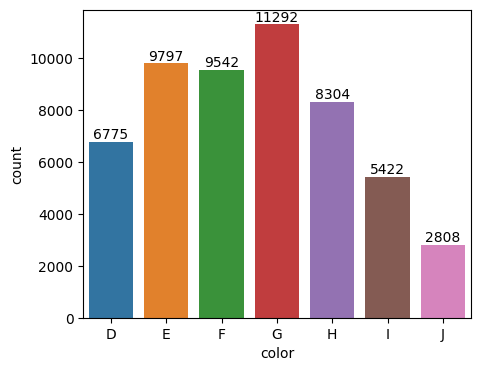

In [11]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='color')
ax.bar_label(ax.containers[0]);

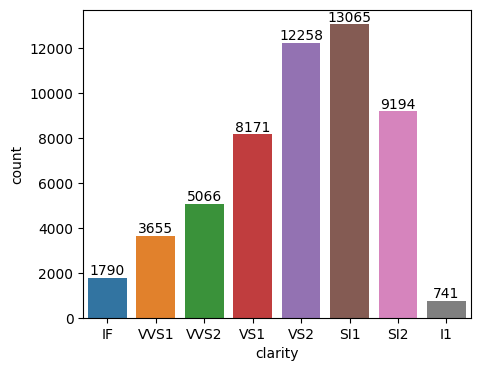

In [12]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='clarity')
ax.bar_label(ax.containers[0]);

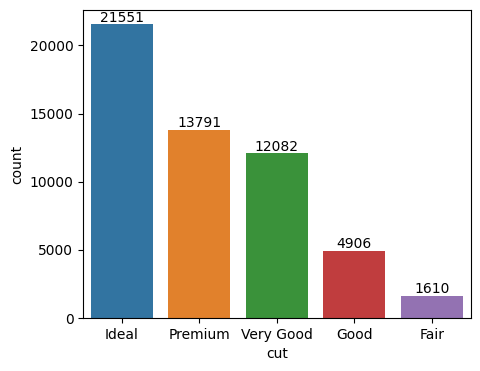

In [13]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='cut')
ax.bar_label(ax.containers[0]);

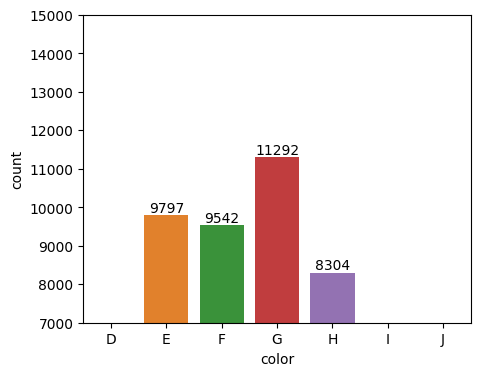

In [14]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='color')
ax.set_ylim([7000, 15000]) # ferana ny datos avoaka. Manombok amn 7000 k@ 12000
ax.bar_label(ax.containers[0]);

In [15]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [16]:
df['clarity'].value_counts().index
# mitovy fa ny fomba filaharany no mahasamihafa azy

CategoricalIndex(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], ordered=False, dtype='category')

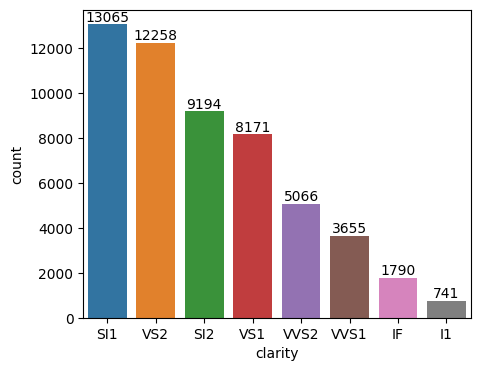

In [17]:
plt.figure(figsize=(5,4))
order = df['clarity'].value_counts(ascending=False).index
ax = sns.countplot(data=df, x='clarity', order=order)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='depth', ylabel='Density'>

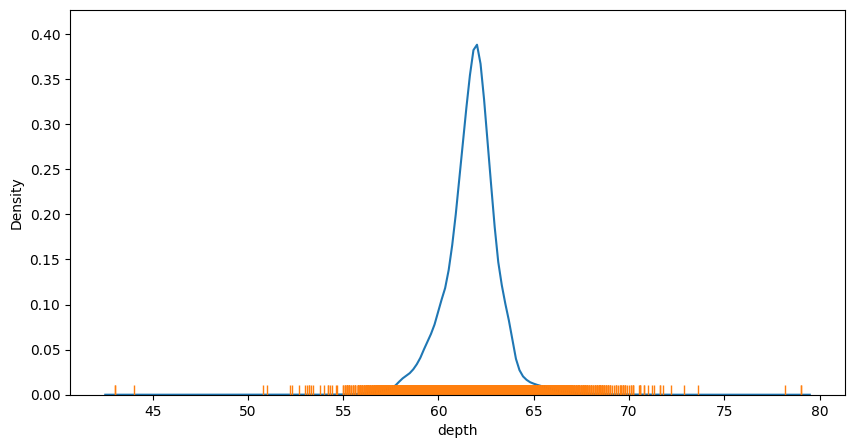

In [18]:
plt.figure(figsize=(10,5), dpi=100)
sns.kdeplot(data=df, x='depth')
sns.rugplot(data=df, x='depth')

<Axes: xlabel='price', ylabel='Proportion'>

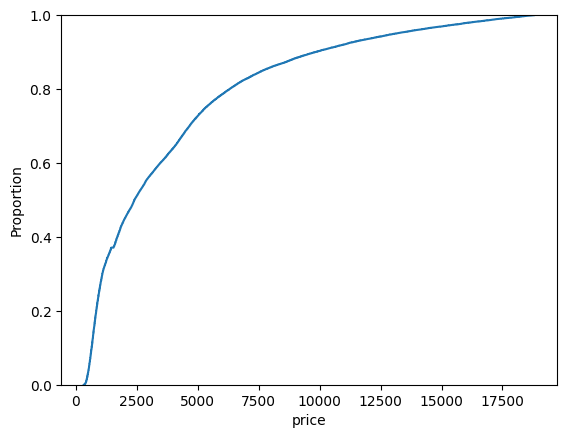

In [19]:
sns.ecdfplot(data=df, x='price')

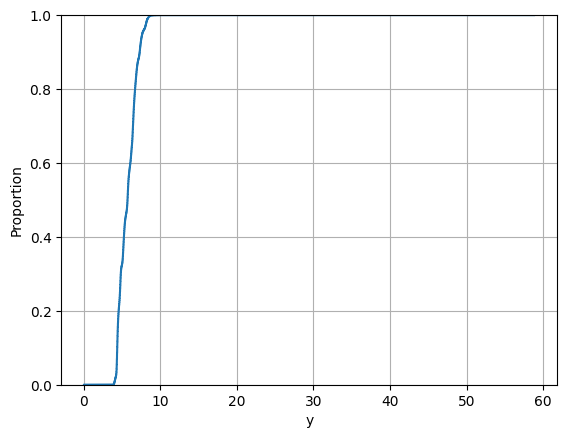

In [20]:
sns.ecdfplot(data=df, x='y')
plt.grid() # mitovy amle eo ambony fa mampiavaka azy manisy ilay carré carré kely ireny

<Axes: xlabel='price'>

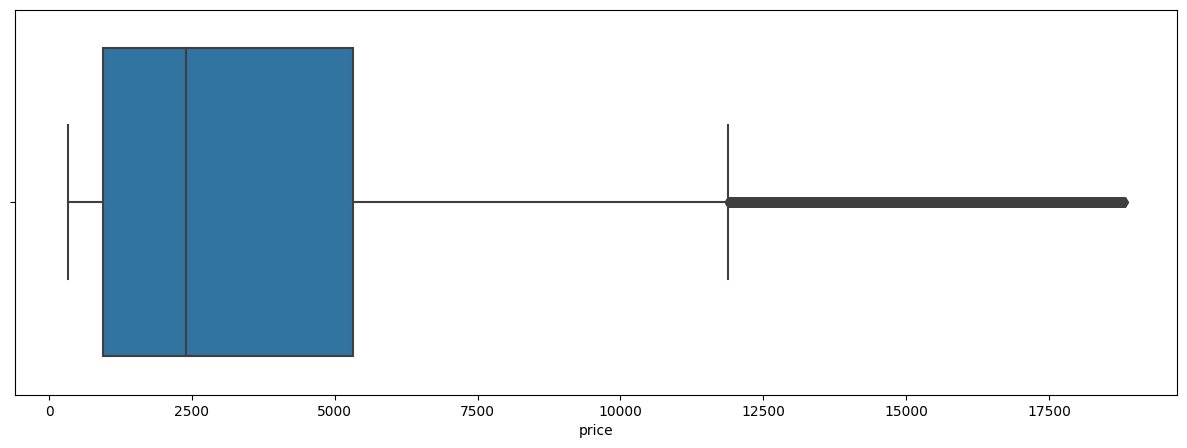

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='price') # horizontal

<Axes: ylabel='price'>

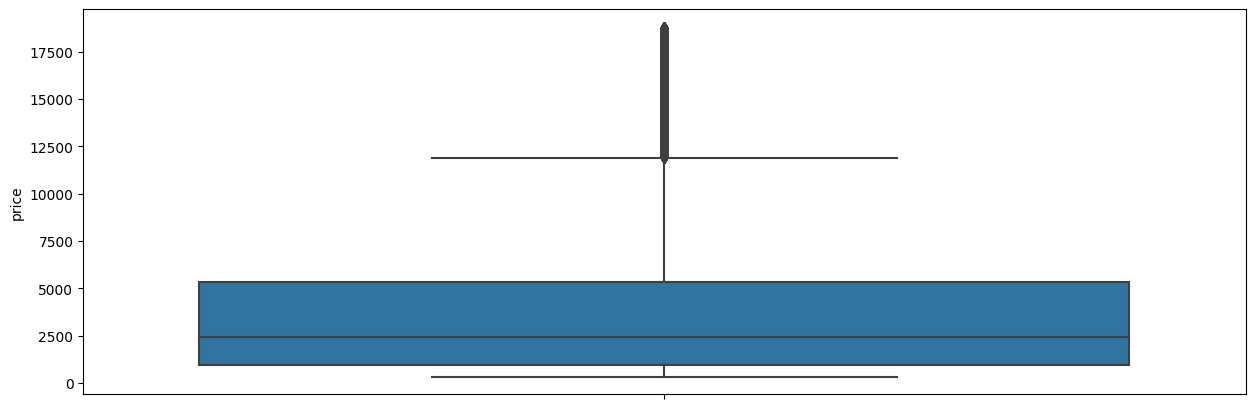

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='price') # vertical

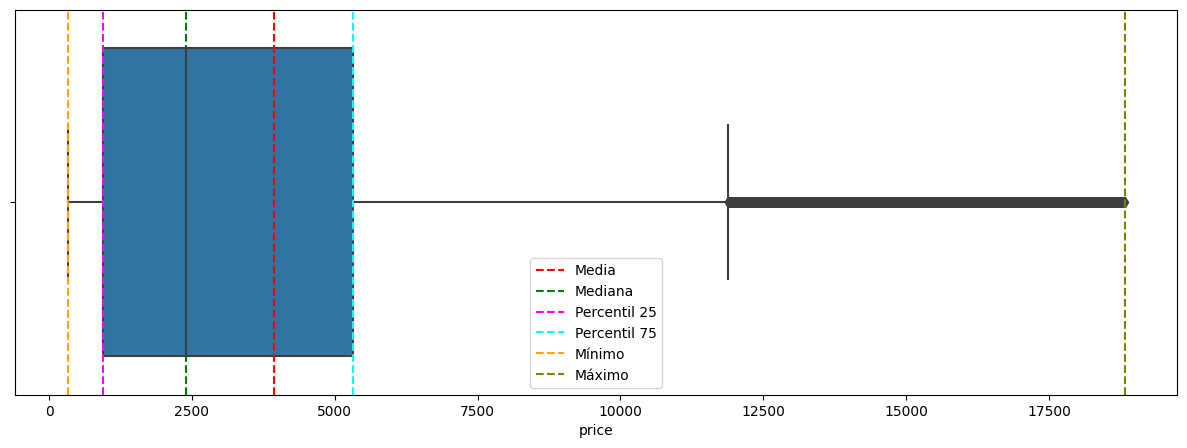

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='price')
mean_line = plt.axvline(df['price'].mean(), color='r', linestyle='--')
median_line = plt.axvline(df['price'].median(), color='g', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
p75_line = plt.axvline(df['price'].quantile(0.75), color='cyan', linestyle='--')
min_line = plt.axvline(df['price'].min(), color="orange", linestyle="--")
max_line = plt.axvline(df['price'].max(), color="olive", linestyle="--")

plt.legend(
    [mean_line, median_line, p25_line, p75_line, min_line, max_line], 
    ['Media', 'Mediana', 'Percentil 25', 'Percentil 75', 'Mínimo', 'Máximo']
    )

## Análisis de bivariante

Gráficosnque analizan 2 variantes al mismo tiempo

* sns.relplot()
* sns.jointplot()
* sns.lineplot()
* sns.rugplot()
* sns.barplot()
* sns.boxplot()

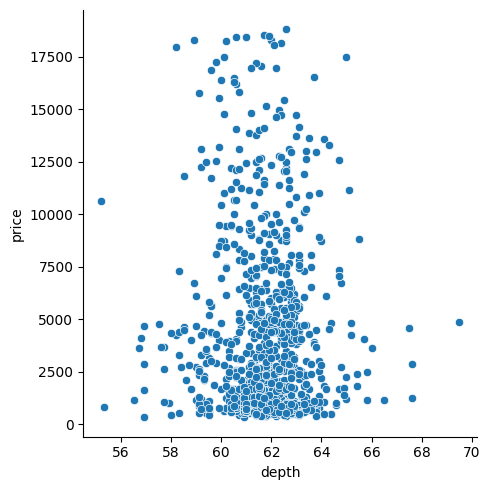

In [24]:
df_sample = df.sample(1000)
sns.relplot(data=df_sample, x='depth', y='price')

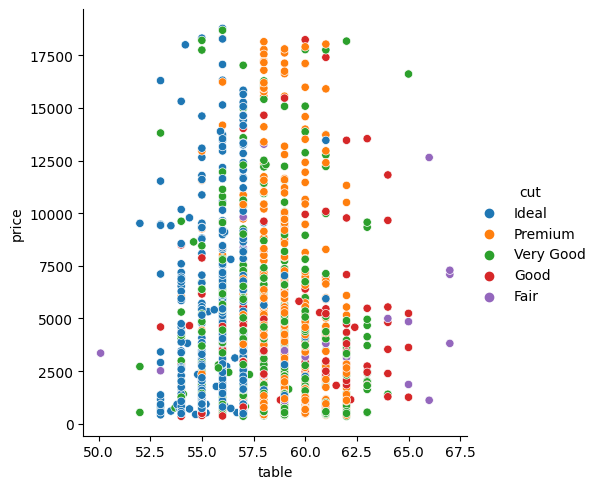

In [25]:
df_sample = df.sample(2000)
sns.relplot(data=df_sample, x='table', y='price', hue='cut')
# el hue='cut' es lo que da color diferentes a los puntitos

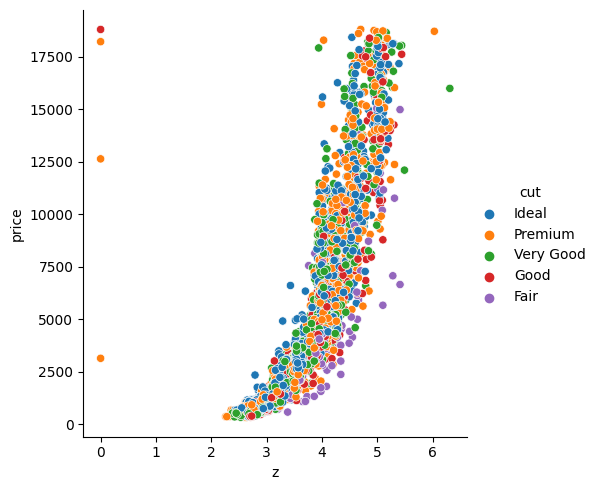

In [26]:
# en miligramos
# 0.5 gramos = 500g
df_sample = df.sample(5000)
sns.relplot(data=df_sample, x='z', y='price', hue='cut')

Text(0.5, 1.0, 'Relación entre precio y quilates')

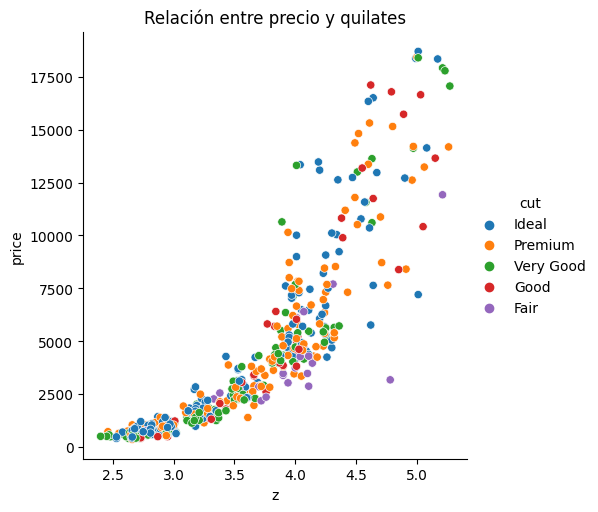

In [27]:
df_sample = df.sample(500)
sns.relplot(data=df_sample, x='z', y='price', hue='cut')
plt.title('Relación entre precio y quilates')
# "Fair", "Good", "Very goog", "Premium", "Ideal".
# En este 

Text(0.5, 1.0, 'Distribución de precios por corte de diamante')

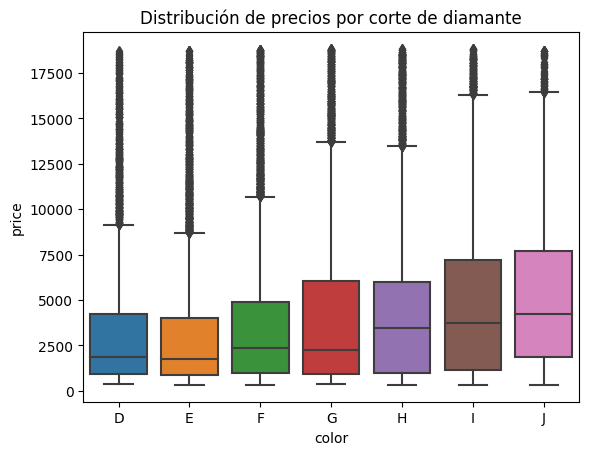

In [28]:
sns.boxplot(data=df, x='color', y='price')
plt.title('Distribución de precios por corte de diamante')

Text(0.5, 1.0, 'Distribución de precios por corte de diamante')

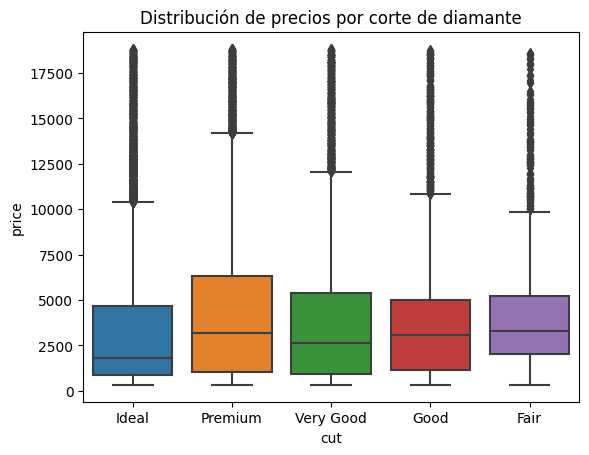

In [29]:
sns.boxplot(data=df, x='cut', y='price')
plt.title('Distribución de precios por corte de diamante')

Text(0.5, 1.0, 'Distribución de claridad por carat de diamante')

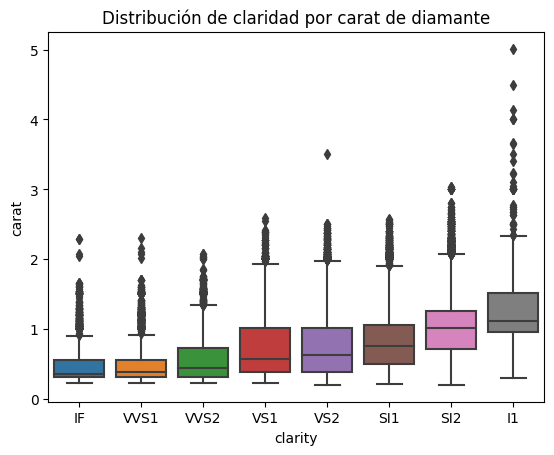

In [30]:
sns.boxplot(data=df, x='clarity', y='carat')
plt.title('Distribución de claridad por carat de diamante')

<Axes: xlabel='clarity', ylabel='price'>

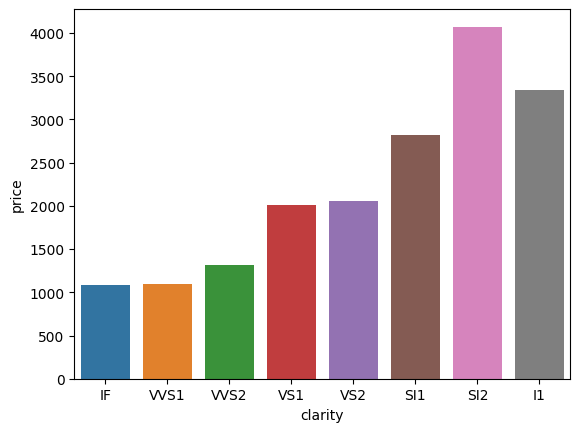

In [31]:
# calcular precio medio por clarity
df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index()
sns.barplot(data=df_price_by_clarity, x='clarity', y='price',)

In [32]:
# Calcular precio por clarity

df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index().sort_values('price', ascending=False)
df_price_by_clarity

,clarity,price
6,SI2,4072.0
7,I1,3344.0
5,SI1,2822.0
4,VS2,2054.0
3,VS1,2005.0
2,VVS2,1311.0
1,VVS1,1093.0
0,IF,1080.0


Text(0.5, 1.0, 'Precio promedio por cut')

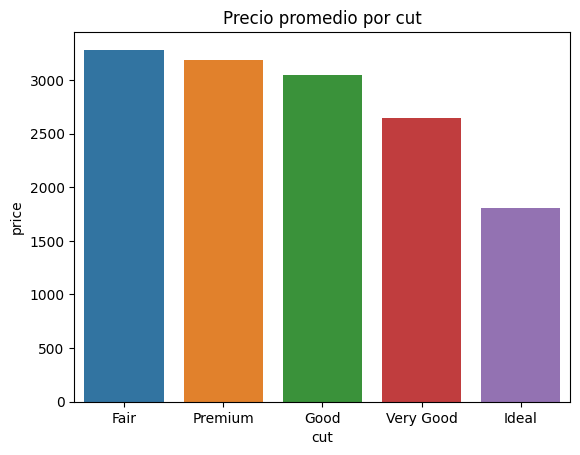

In [33]:
df_price_by_cut = df.groupby('cut')['price'].median().reset_index().sort_values('price', ascending=False)
sns.barplot(data=df_price_by_cut, x='cut', y='price', errorbar=None, order=df_price_by_cut['cut'])
plt.title('Precio promedio por cut')

In [34]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Precio en base de corte')

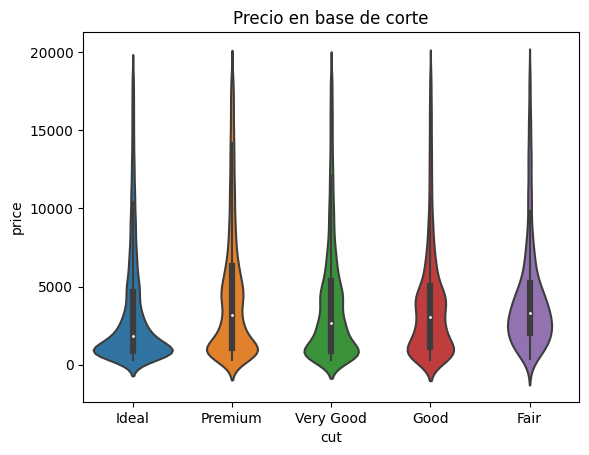

In [35]:
# sns.violinplot: price en base cut, clarity, color

df = sns.load_dataset('diamonds')
sns.violinplot(data=df, x='cut', y='price')
plt.title('Precio en base de corte')

Text(0.5, 1.0, 'El precio en base de color')

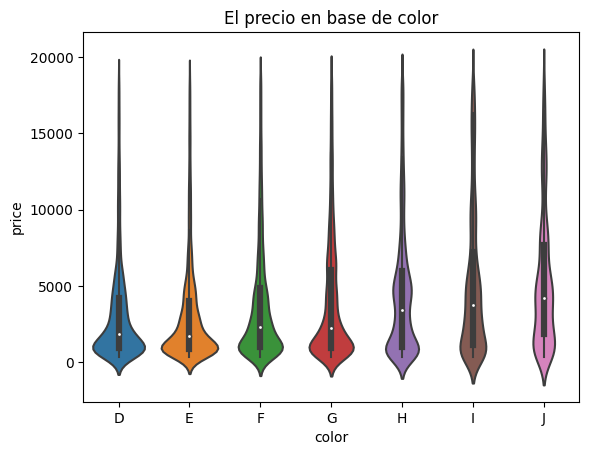

In [36]:
sns.violinplot(data=df, x='color', y='price')
plt.title('El precio en base de color')

Text(0.5, 1.0, 'El precio en base de claridad')

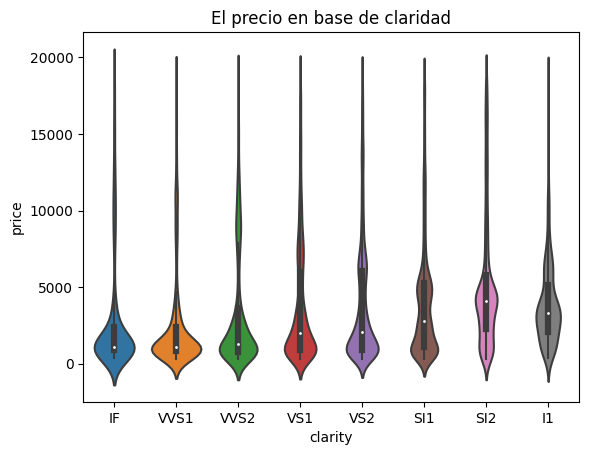

In [37]:
sns.violinplot(data=df, x='clarity', y='price')
plt.title('El precio en base de claridad')

Text(0.5, 1.0, 'El carat en base del corte')

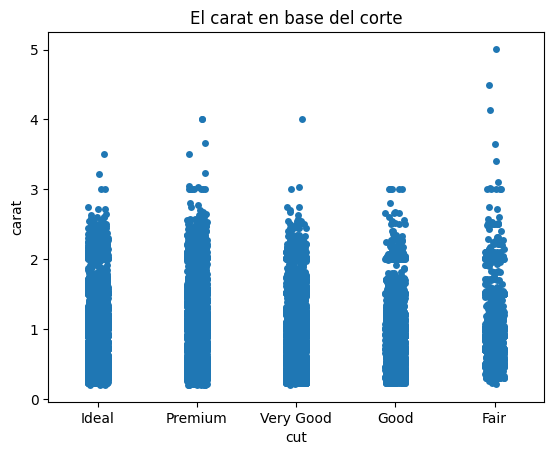

In [38]:
# sns.stripplot

sns.stripplot(data=df, x='cut', y='carat')
plt.title('El carat en base del corte')

Text(0.5, 1.0, 'El dep en base del corte')

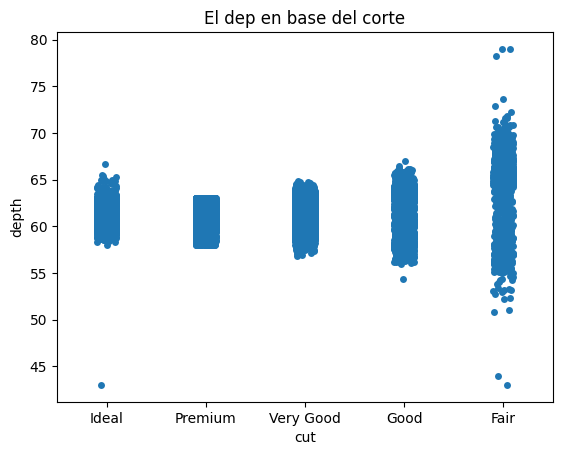

In [39]:
sns.stripplot(data=df, x='cut', y='depth')
plt.title('El dep en base del corte')

<Axes: xlabel='cut', ylabel='price'>

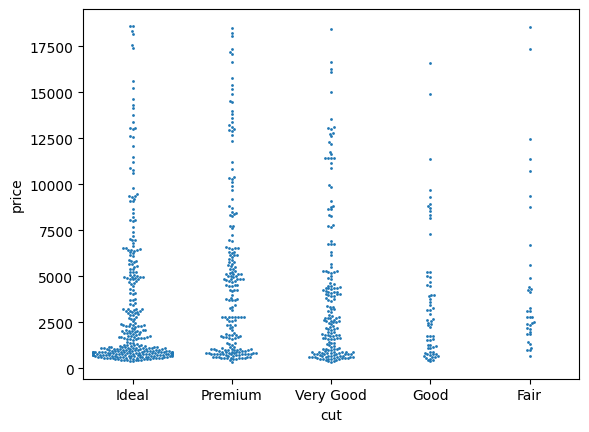

In [40]:
# sns.swarmplot: CUIDADO consume recursos dado que no superpone los puntos
# mila jerena raha mifanaraka tsara ny isa sy ny angezany

sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2)


<Axes: xlabel='cut', ylabel='price'>

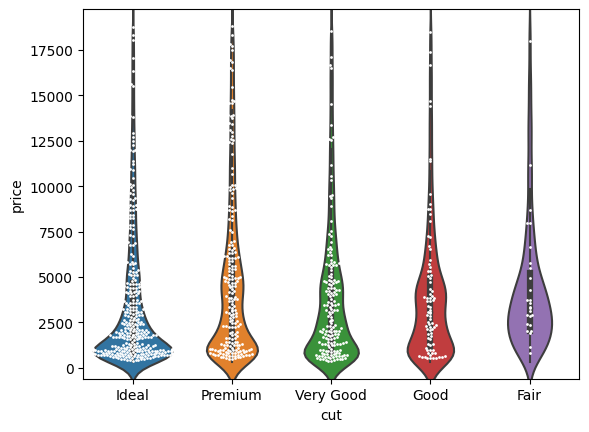

In [41]:
sns.violinplot(data=df, x='cut', y='price')
sns.swarmplot(data=df.sample(800), x='cut', y='price', size=2, color='white')

## Análisis multivariante

Gráficos que analizan más de 2 variantes al mismo tiempo

* sns.boxplot
* sns.pairplot()
* sns.replot() con hue, col, row, size
* sns.heatmap()
* sns.clustermap()

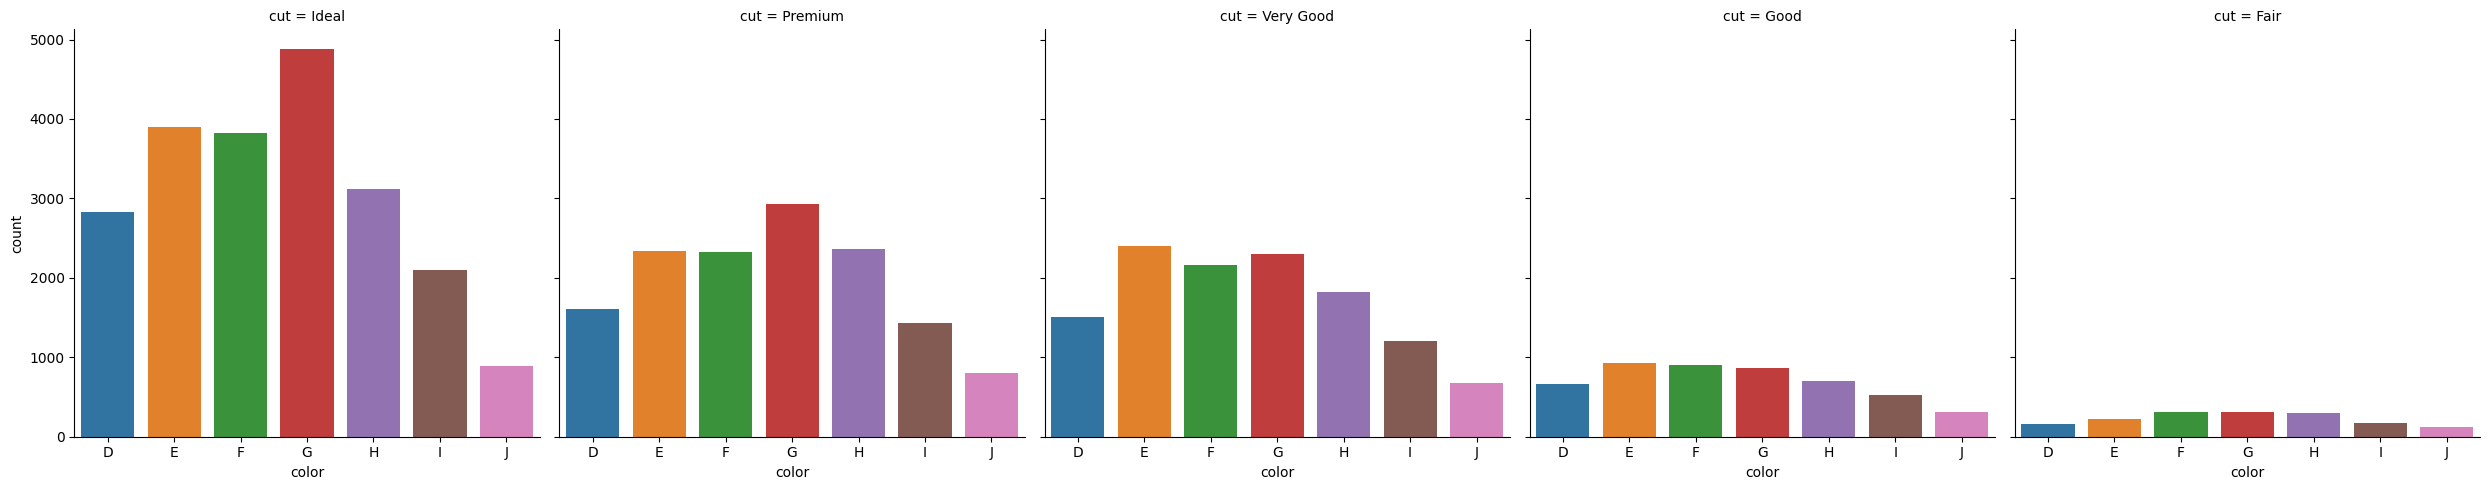

In [42]:
# sns.catplot
# Gráfico de conteo para mostrar la distribución de colores en cada categoría de corte cut

sns.catplot(data=df, x='color', col='cut', kind='count')

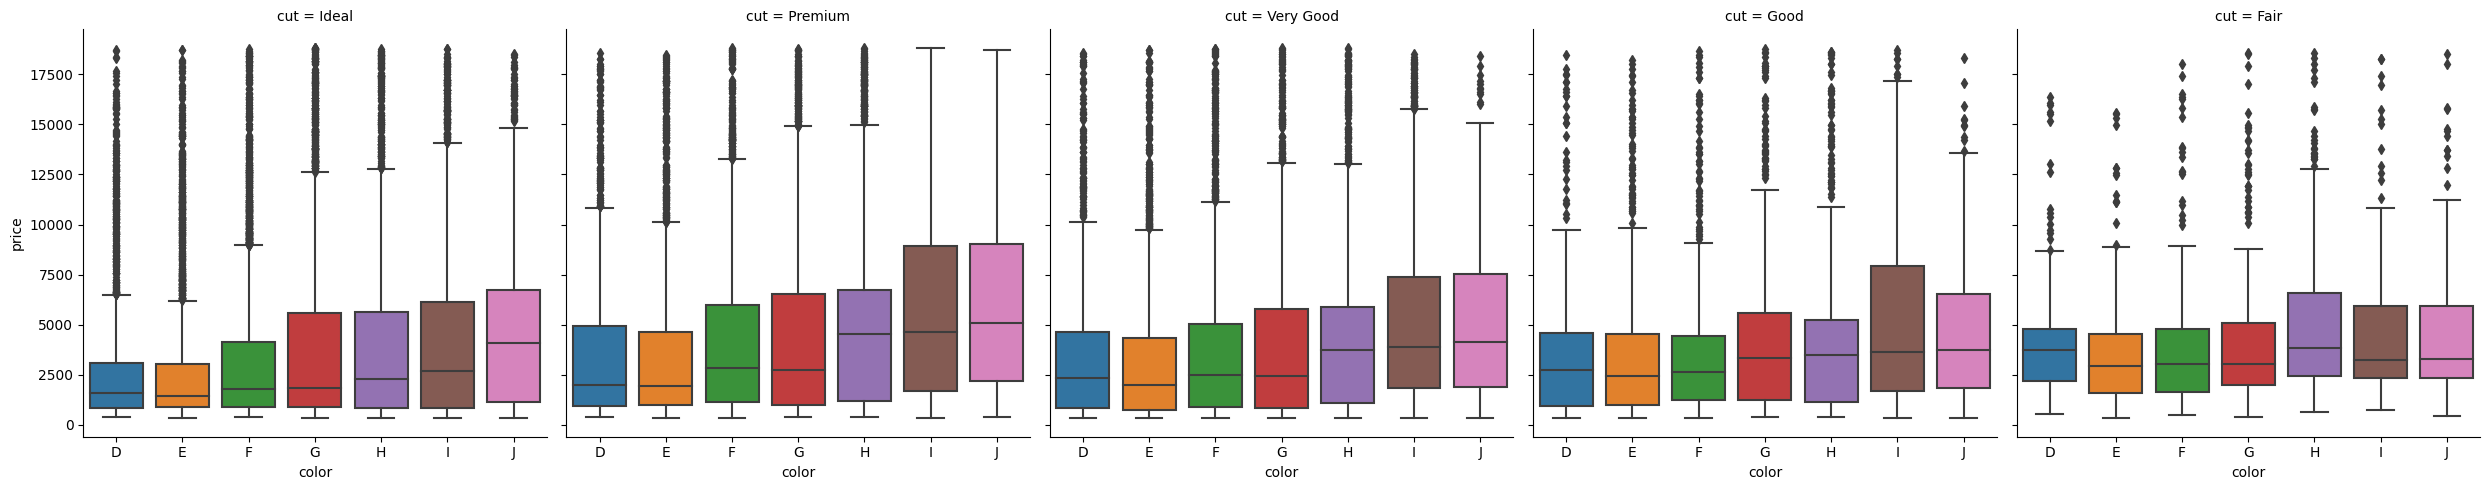

In [43]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='box')

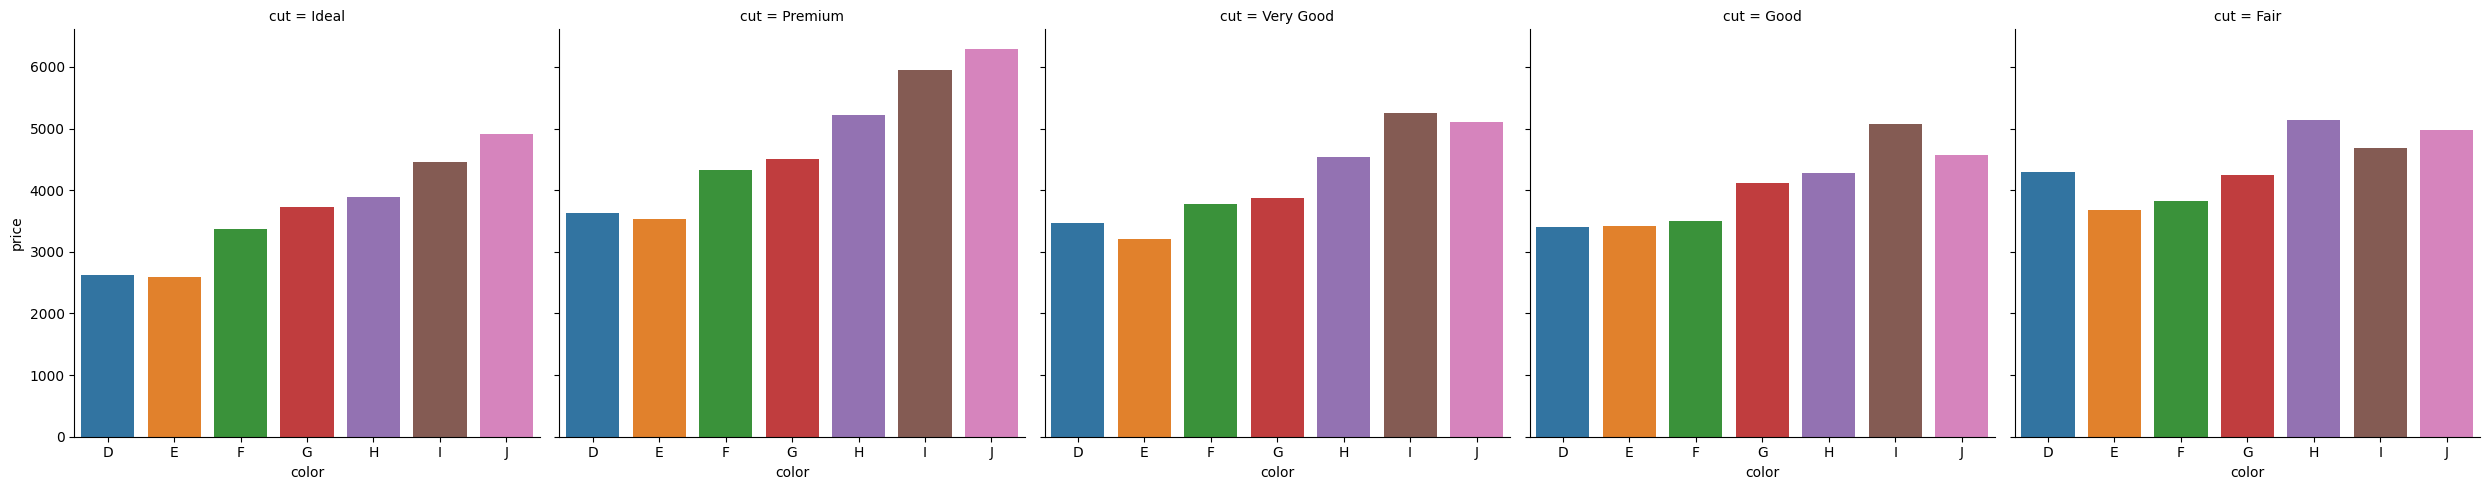

In [44]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='bar', errorbar=None)

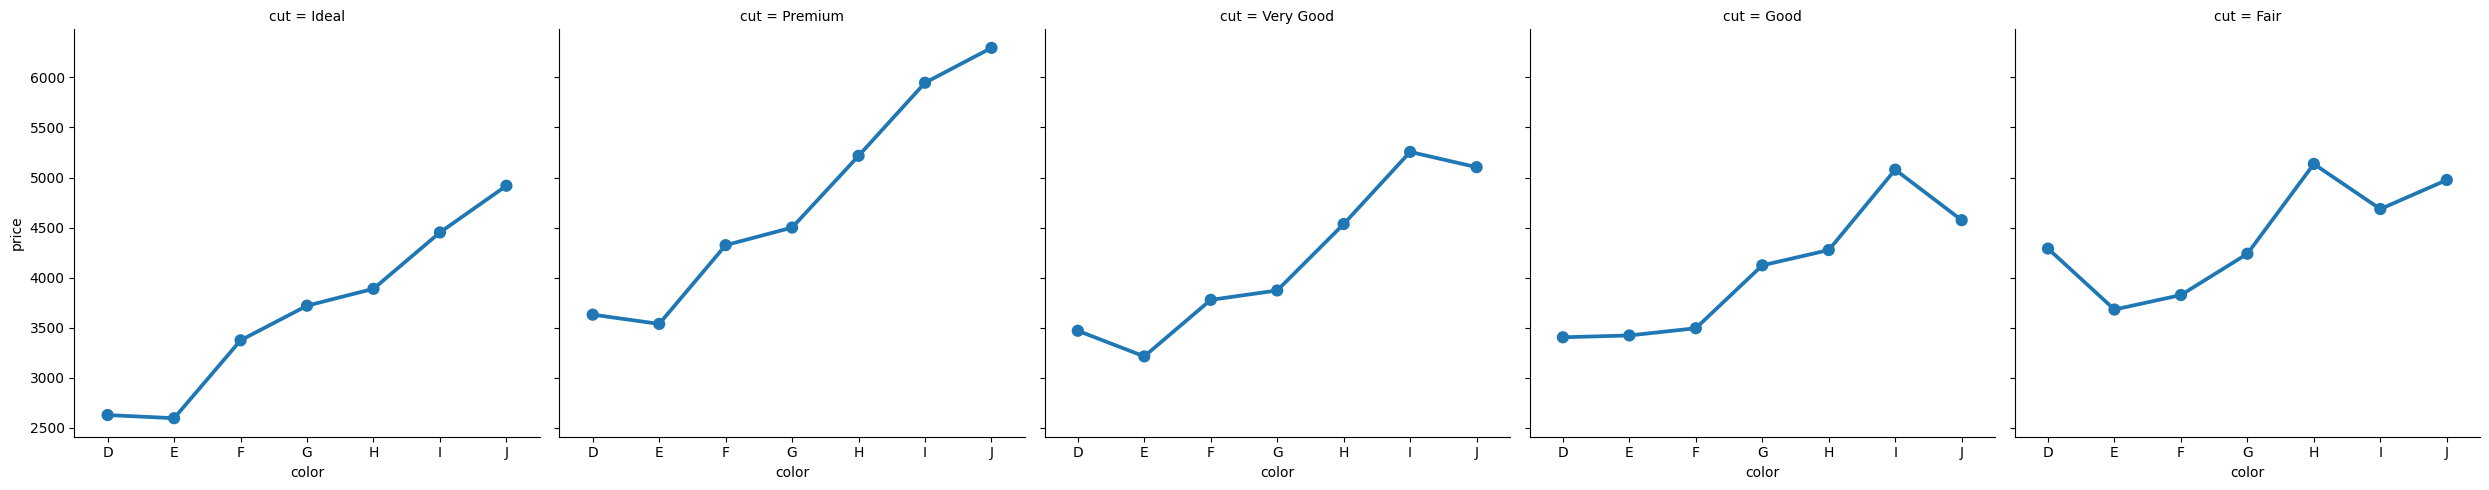

In [45]:
# Gráfico de puntos para analizar tendencias
sns.catplot(data=df, x='color', y='price', col='cut', kind='point', errorbar=None)

<Axes: xlabel='color', ylabel='price'>

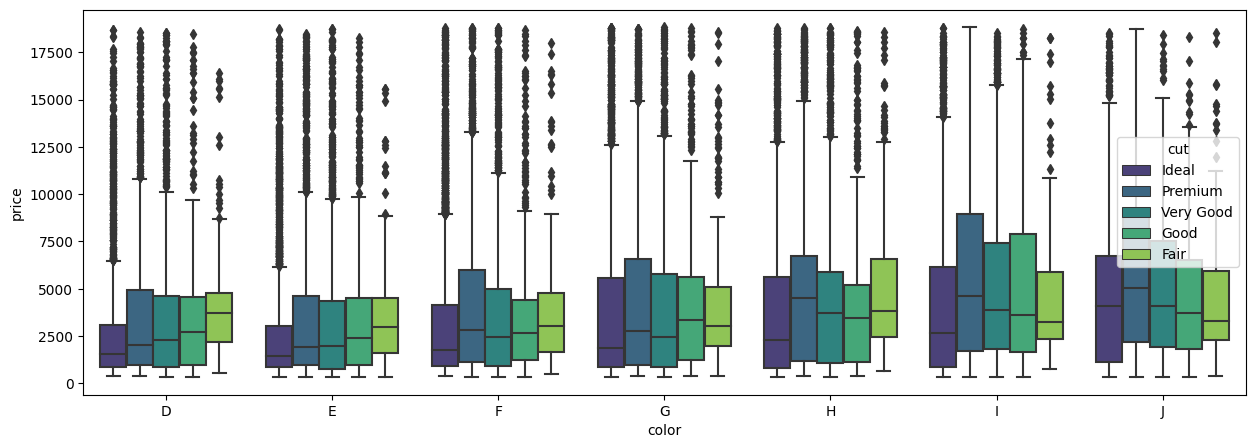

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='color', y='price', hue='cut', palette='viridis')

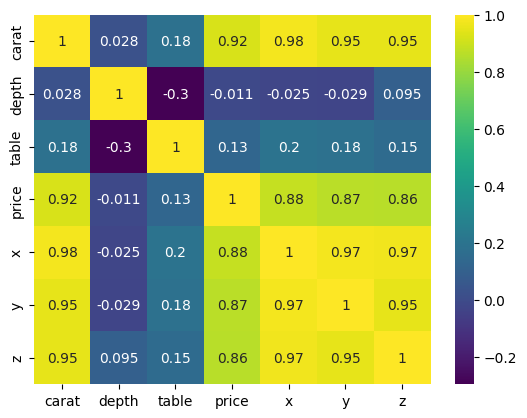

In [47]:
# sns.heatmap 
# mampitaha ny column rehetra

df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='viridis');

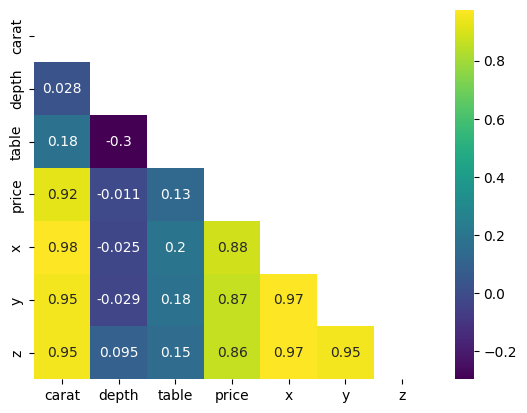

In [48]:
import numpy as np

df_corr = df.corr(numeric_only=True)
filter = np.triu(df_corr) #np.tril para el tríangulo superior
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter);

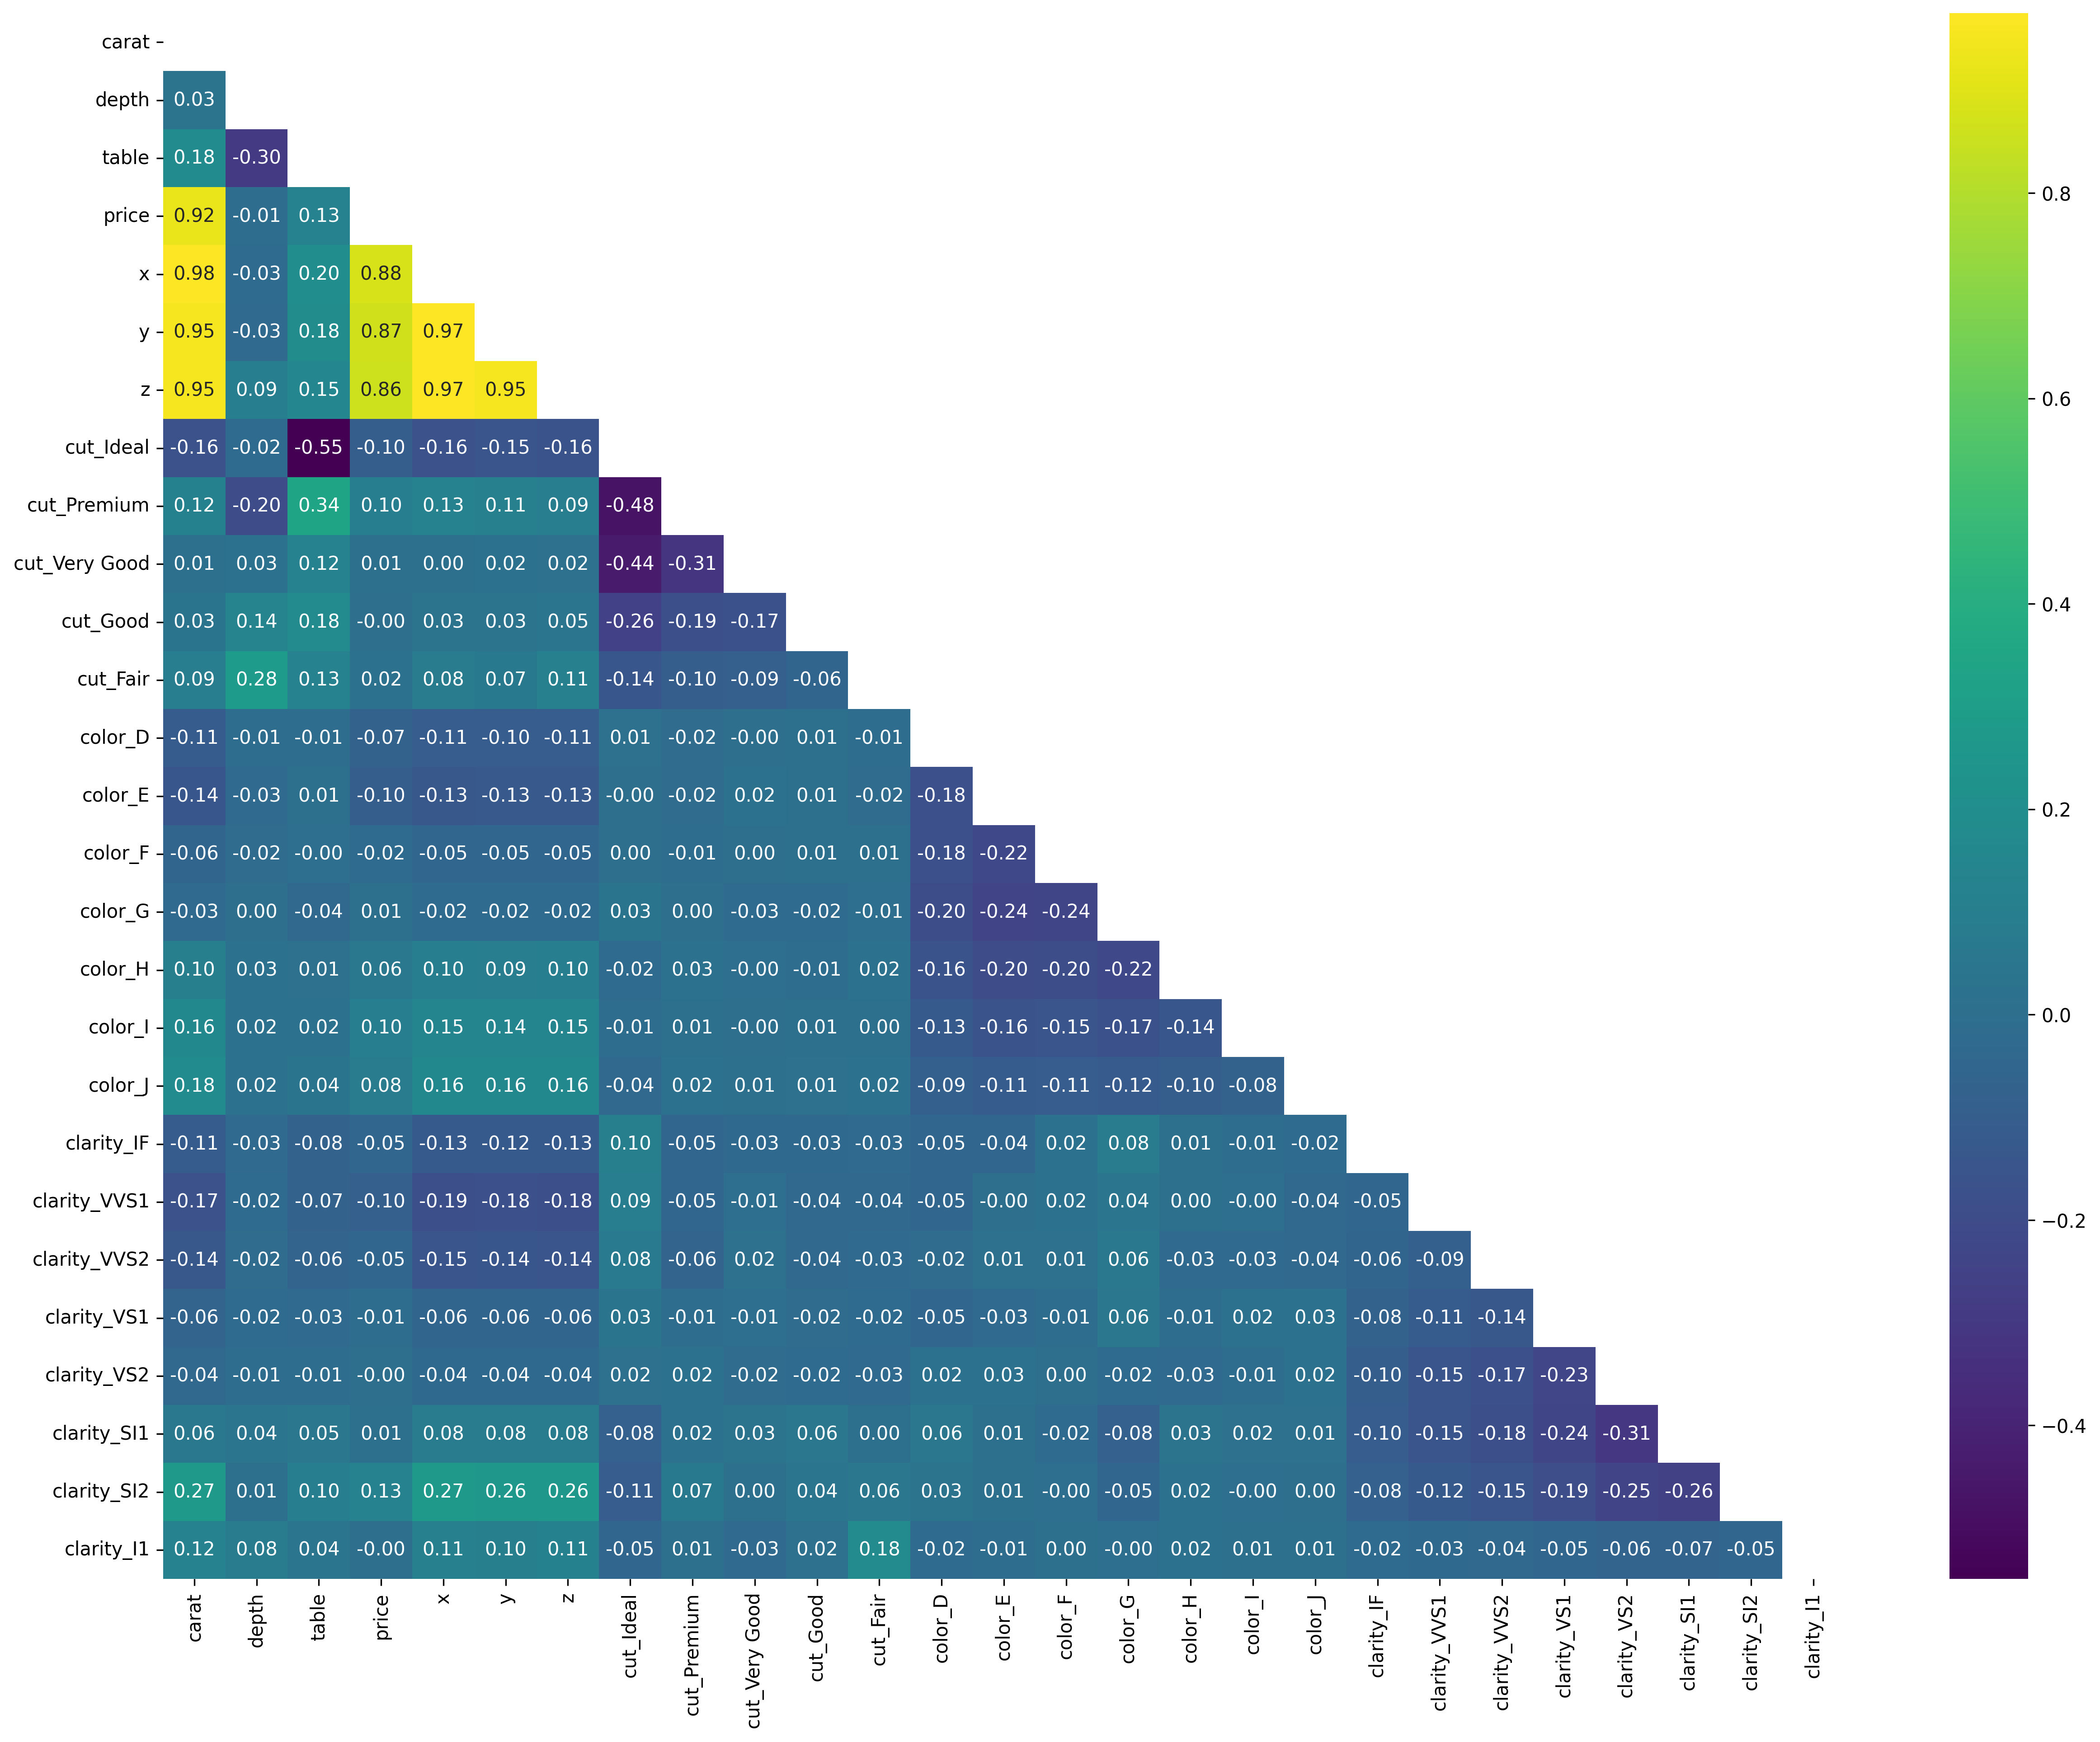

In [49]:
# sns.

plt.figure(figsize=(20,15), dpi=300) # dpi= es un ajuste grafico
df = pd.get_dummies(df)
df_corr = df.corr()
filter = np.triu(df_corr) # np.tril para el triangulo superior
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter, fmt='.2f');
# fmt= para poner : y luego se ve mejor las graficas

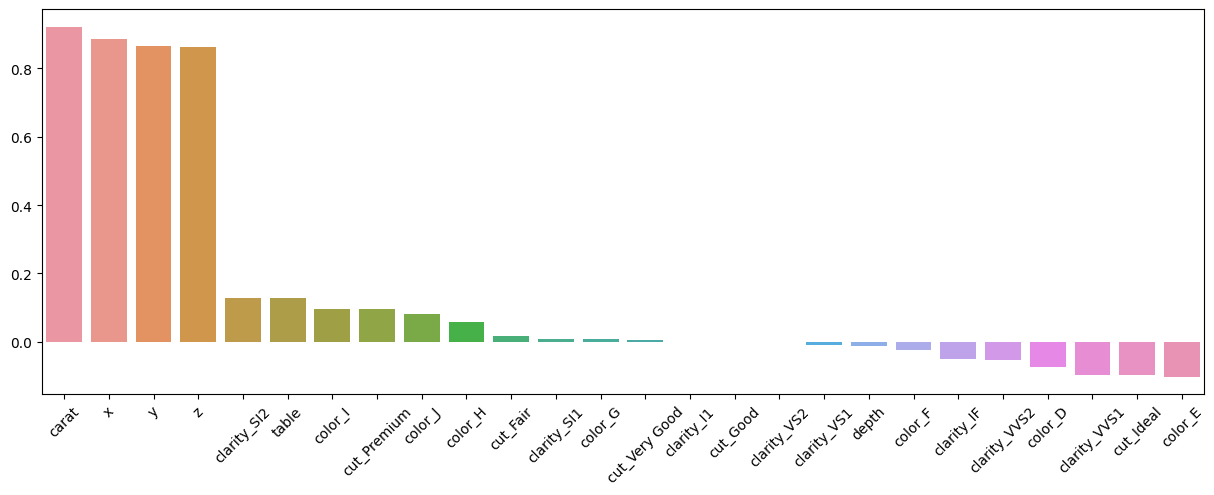

In [50]:
# correlación con barras

df_corr = df.corr() # calcular matriz de correlación
corr_price = df_corr['price'] # filtrar solo la columna de correlación de precio
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar de forma descendente

plt.figure(figsize=(15,5))
sns.barplot(x=corr_price.index, y=corr_price.values)
plt.xticks(rotation=45);


In [51]:
df_corr['price'].values

array([ 9.21591301e-01, -1.06474046e-02,  1.27133902e-01,  1.00000000e+00,
        8.84435161e-01,  8.65420898e-01,  8.61249444e-01, -9.71753849e-02,
        9.57059722e-02,  6.59348773e-03, -3.12019536e-04,  1.87282203e-02,
       -7.24725441e-02, -1.01089368e-01, -2.41608630e-02,  8.55612588e-03,
        5.92228674e-02,  9.71252285e-02,  8.17103594e-02, -4.95960070e-02,
       -9.52661654e-02, -5.23808313e-02, -9.88625838e-03, -1.06168793e-03,
        8.95663382e-03,  1.28420294e-01, -2.55336064e-04])

In [52]:
df_corr['price'].index

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1',
       'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1'],
      dtype='object')

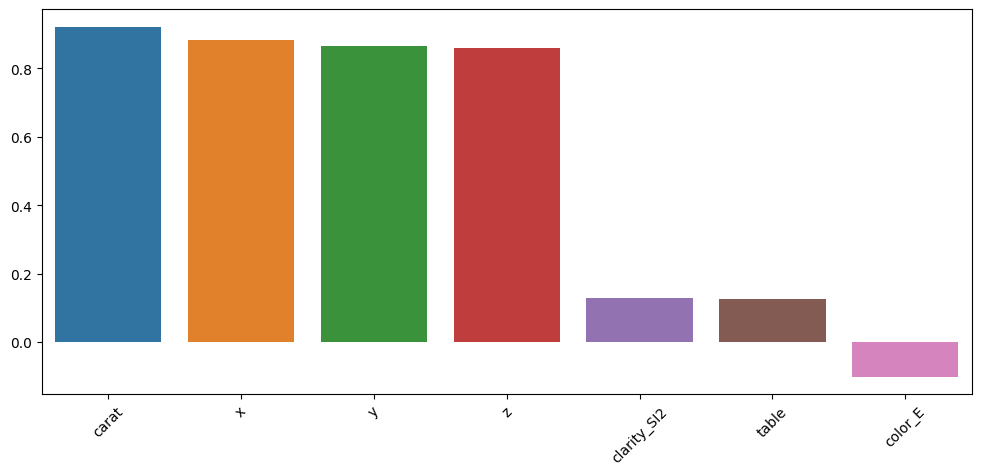

In [53]:
df_corr = df.corr() # calcular matriz de correlación
corr_price = df_corr['price'] # filtrar solo la columna de correlación de precio
filter = (corr_price < -0.1) | (corr_price > 0.1)
corr_price = corr_price[filter]
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar de forma descendente

plt.figure(figsize=(12,5))
sns.barplot(x=corr_price.index, y=corr_price.values)
plt.xticks(rotation=45)

labels = [f'{value}' for value in corr_price.values] # redondear las correlaciones a dos decimales

# labels = [str(round(value, 2)) for value in corr_price.values]

ax.bar_label(ax.containers[0], labels=labels);

In [54]:
df.shape

(53940, 27)

In [55]:
df = sns.load_dataset('diamonds')
df_cluster = df[['price', 'cut']].copy()
df_cluster['cut'] = df_cluster['cut'].map({
    'Fair': 1,
    'Very Good': 2,
    'Good': 3,
    'Premium': 4,
    'Ideal': 5
})
df_cluster.head(2)

,price,cut
0,326,5
1,326,4


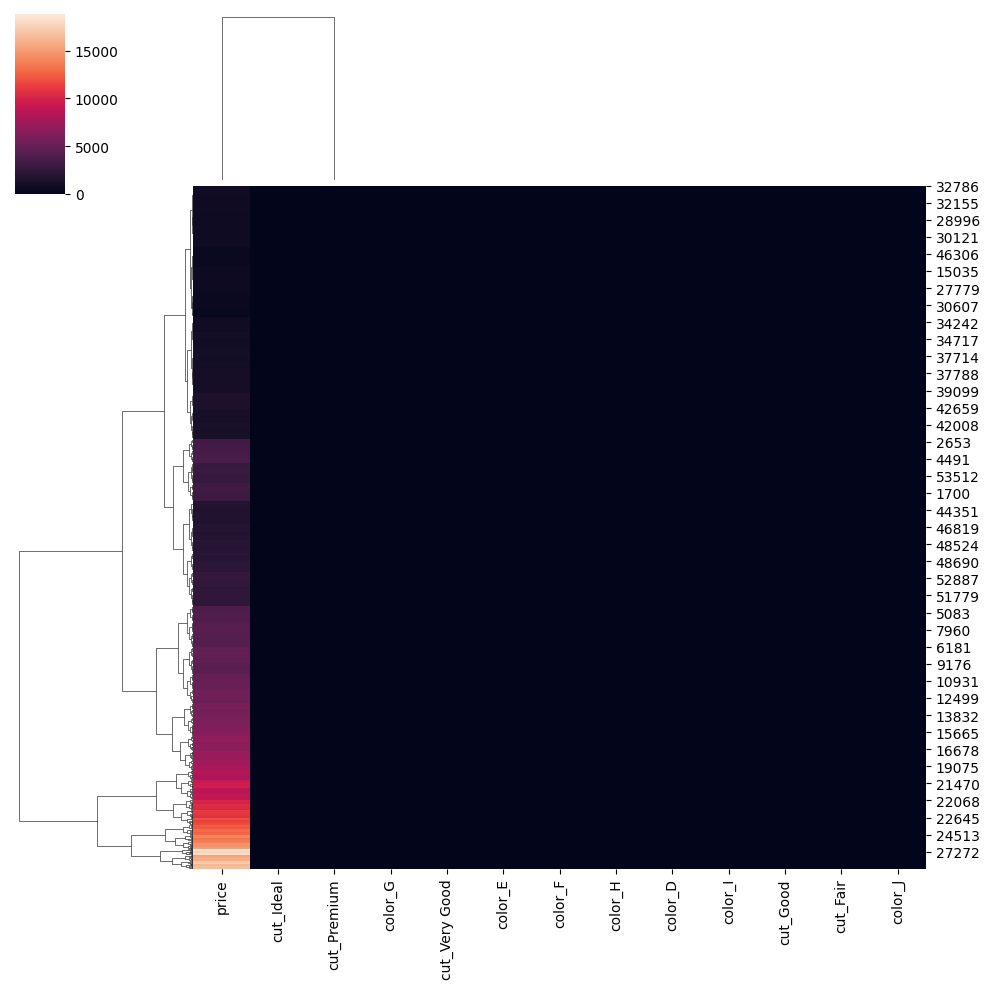

In [56]:
# TODO: cut, color, price, carat
df_cluster = pd.get_dummies(df[['cut', 'color']])
df_cluster['price'] = df['price']
sns.clustermap(df_cluster)

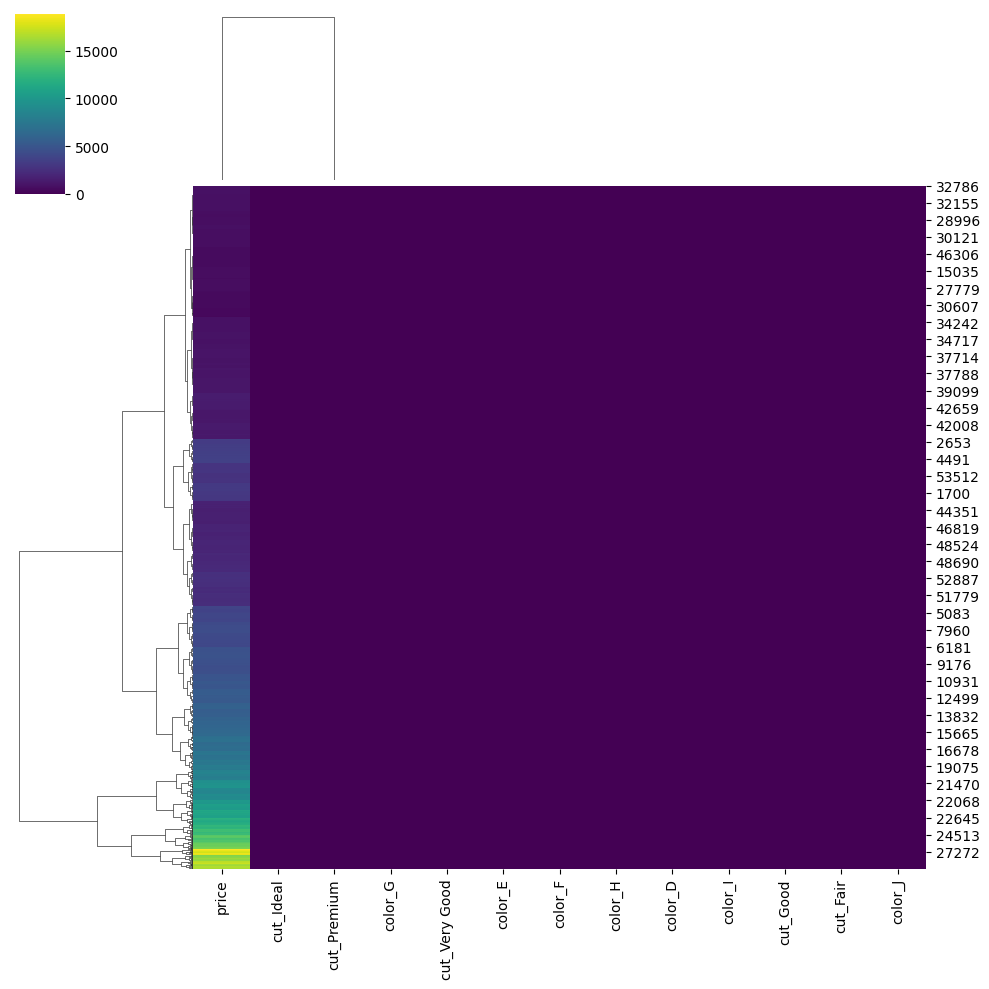

In [57]:
sns.clustermap(df_cluster, cmap='viridis')

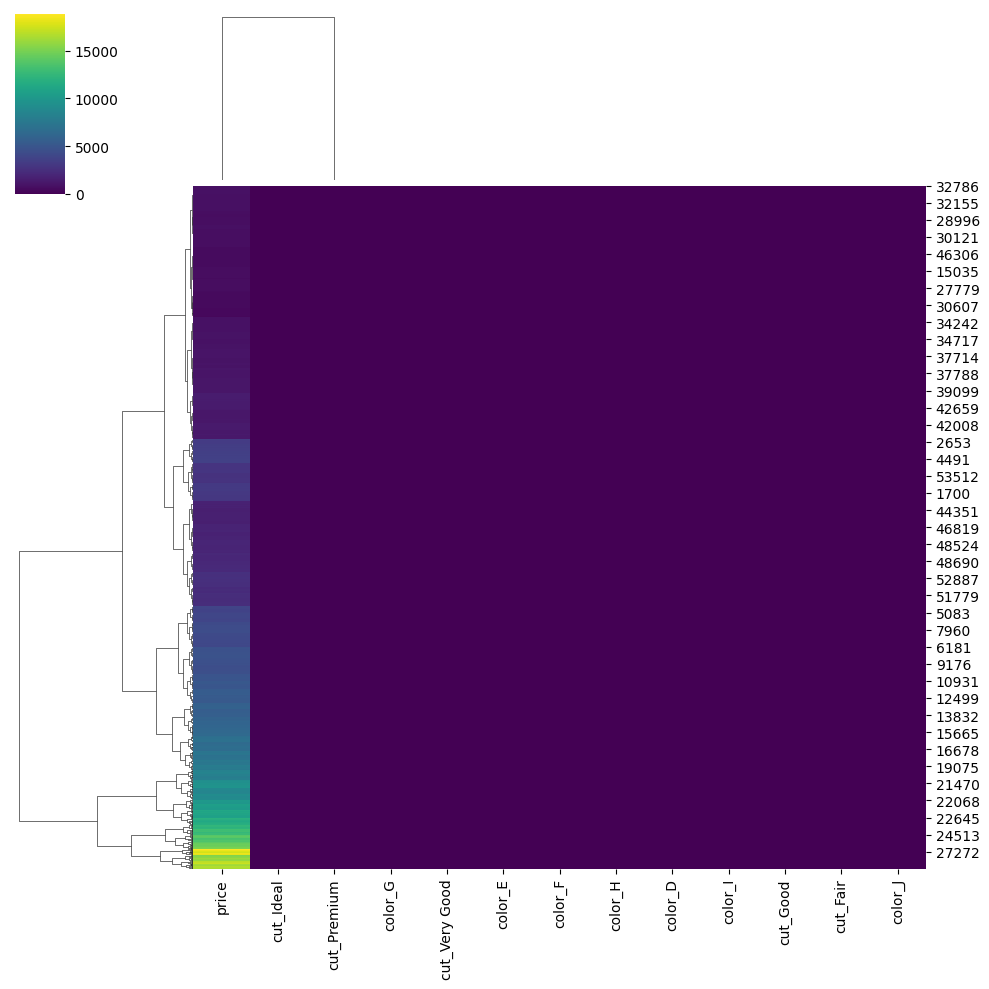

In [58]:
sns.clustermap(df_cluster, cmap='viridis');

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
df.pivot_table

<bound method DataFrame.pivot_table of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [68]:
# tabla de precios promedio por calidad de corte y color 
pivot = df.pivot_table(index='cut', columns='color', values='price', aggfunc='mean')
pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


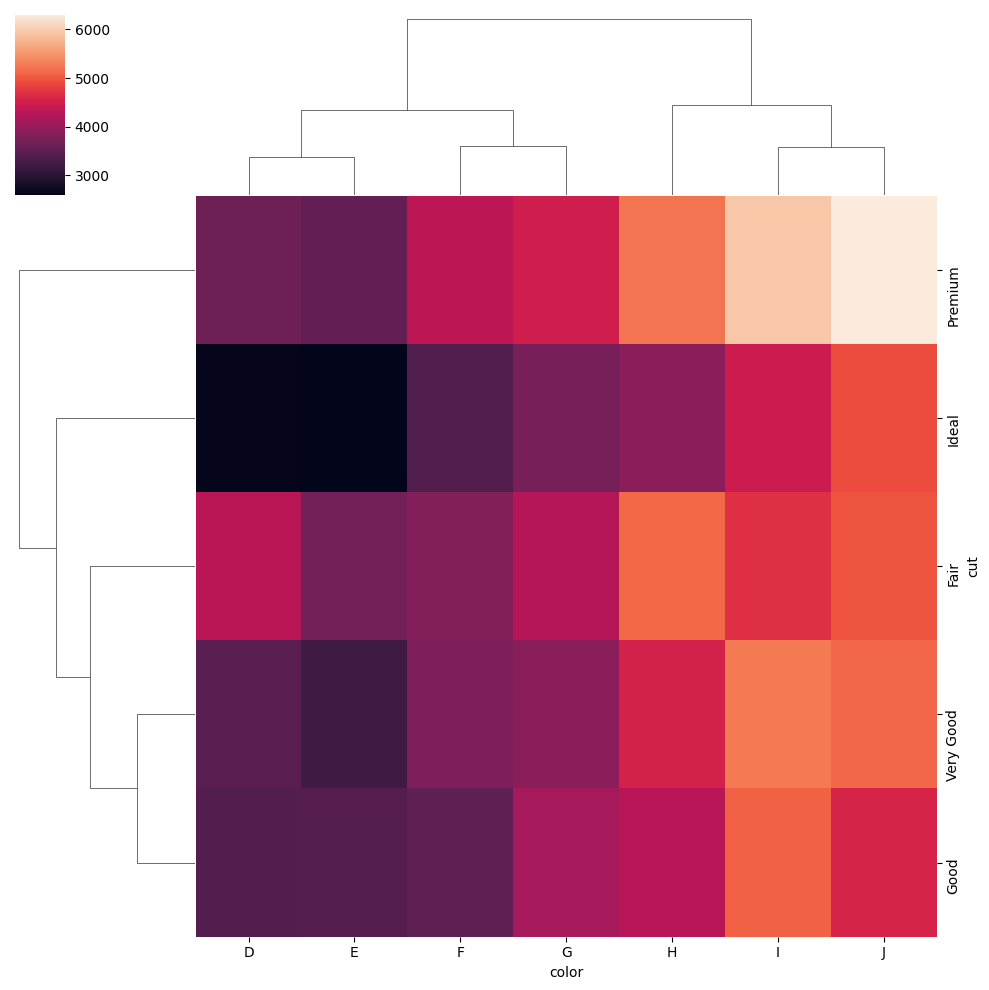

In [69]:
sns.clustermap(pivot)

In [72]:
# cantidad de diamantes por corte y claridad
pivot = df.pivot_table(index='cut', columns='clarity', values='price', aggfunc='count')
pivot

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146
Premium,230,616,870,1989,3357,3575,2949,205
Very Good,268,789,1235,1775,2591,3240,2100,84
Good,71,186,286,648,978,1560,1081,96
Fair,9,17,69,170,261,408,466,210


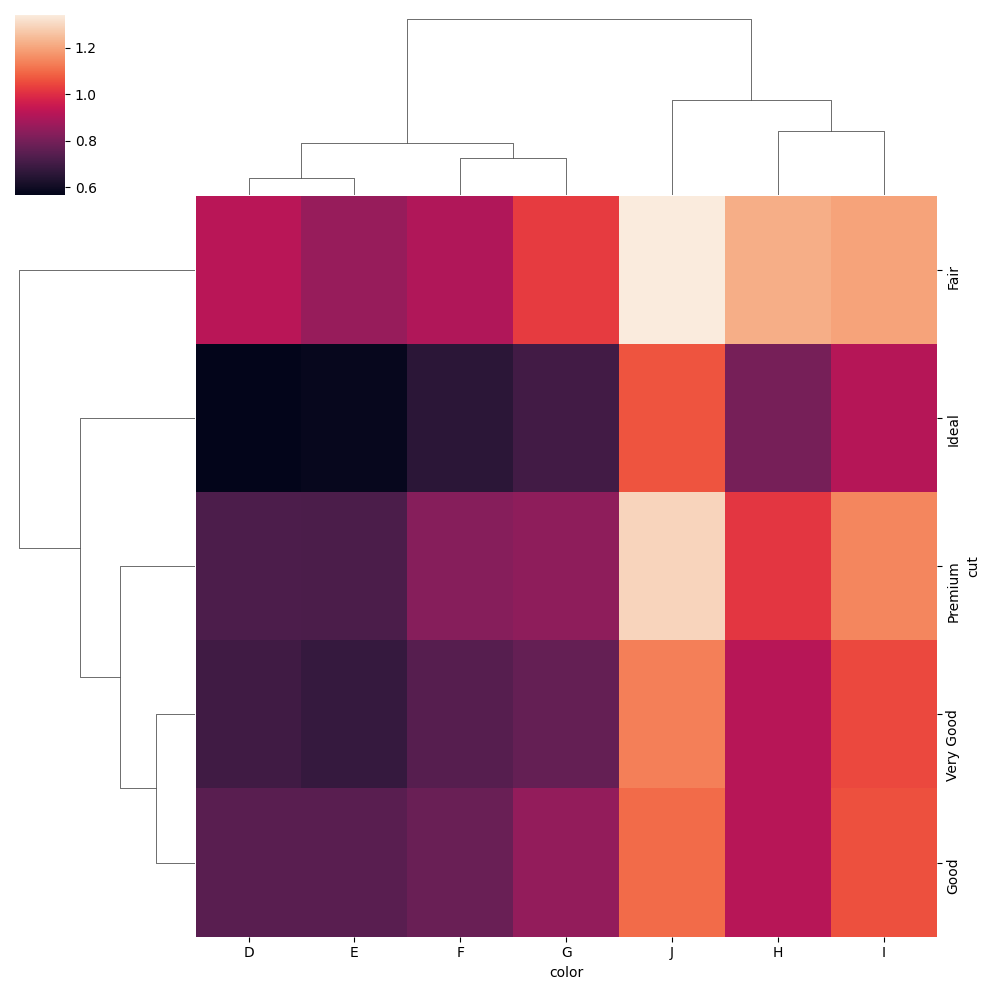

In [75]:
sns.clustermap(pivot)

In [74]:
# media de quilates (carat) por corte y color
pivot = df.pivot_table(index='cut', columns='color', values='carat', aggfunc='mean')
pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,0.565766,0.578401,0.655829,0.700715,0.799525,0.913029,1.063594
Premium,0.721547,0.717745,0.827036,0.841488,1.016449,1.144937,1.293094
Very Good,0.696424,0.676317,0.740961,0.766799,0.915948,1.046952,1.133215
Good,0.744517,0.745134,0.775930,0.850896,0.914729,1.057222,1.099544
Fair,0.920123,0.856607,0.904712,1.023822,1.219175,1.198057,1.341176


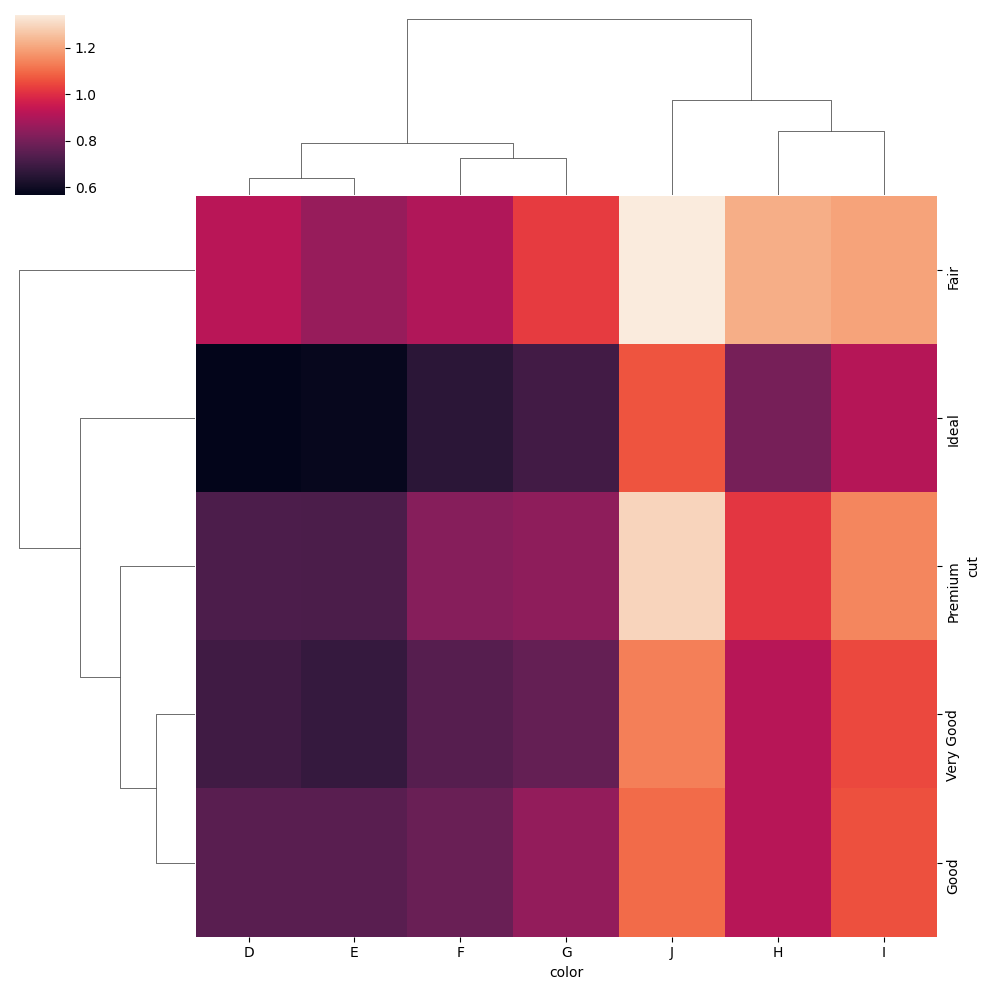

In [76]:
sns.clustermap(pivot)

<Axes: xlabel='color', ylabel='cut'>

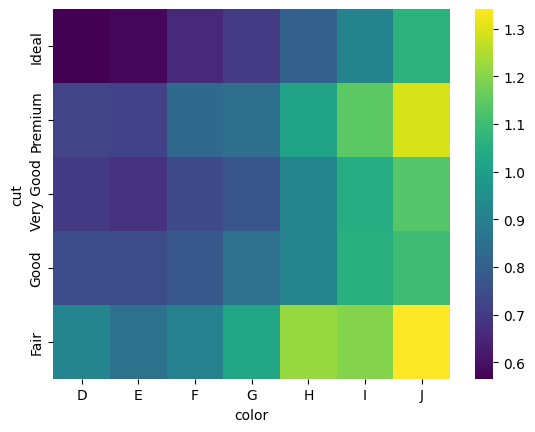

In [77]:
sns.heatmap(pivot, cmap='viridis')